In [ ]:
# <center> 👉 class_06_2 IP » _Smoothing (Blurring) - Filter, Convolution_ </center>

## ▶ Filter and Convolution  

Convolutional operations are the core computational method for spatial area filtering.   
Spatial area filtering is a method of obtaining new pixel values by utilizing the pixels to be computed and the pixels around them.   
At this point, you need to decide to what extent you want to use the surrounding pixels and how to do the calculations.   
This is what the kernel does.   
The kernel is also called a window, a filter, or a mask.   

In the figure below, the 3 x 3 matrix in the middle is the kernel.

컨볼루션 연산은 공간 영역 필터링을 위한 핵심 연산 방법입니다.   
공간 영역 필터링은 연산 대상 픽셀과 그 주변 픽셀들을 활용하여 새로운 픽셀 값을 얻는 방법입니다.   
이때 주변 픽셀을 어느 범위까지 활용할지 그리고 연산은 어떻게 할지를 결정해야 합니다.   
이런 역할을 하는 것이 바로 커널(kernel)입니다.   
커널은 윈도(window), 필터(filter), 마스크(mask)라고도 부릅니다.   

아래 그림에서 가운데 있는 3 x 3 짜리 행렬이 바로 커널입니다. 

<img src = './images/practice_img/kernel.png' width=600 height=400>  
<center>https://www.slipp.net/wiki/pages/viewpage.action?pageId=26641520</center>  

The figure above is an example of a convolution operation with a 3 x 3 kernel.   
Based on the pixel value 6 in the original video, we used the surrounding pixel values of 3, 0, 1, 2, 1, 4, 2, 2 (clockwise).   
The elements of the kernel at a one-to-one correspondence were multiplied by the corresponding input pixel values, and the sum of them all was determined as the resulting pixel value.   
Repeating these operations to the last pixel is called convolution operations.    
    
위 그림은 3 x 3 커널로 컨볼루션 연산을 하는 예시입니다.   
기존 영상에서 픽셀 값 6을 기준으로 주변에 있는 픽셀 값인 3, 0, 1, 2, 1, 4, 2, 2(시계 방향)까지 활용했습니다.   
일대일로 대응하는 위치에 있는 커널의 요소와 대응하는 입력 픽셀 값을 곱해서 모두 합한 것을 결과 픽셀 값으로 결정했습니다.   
이런 연산을 마지막 픽셀까지 반복하는 것을 컨볼루션 연산이라고 합니다.

<img src = './images/practice_img/kernel2.png' width=600 height=400>  
<center>https://www.slipp.net/wiki/pages/viewpage.action?pageId=26641520</center>

<img src = './images/practice_img/kernel.gif' width=600 height=400>  
<center>https://www.slipp.net/wiki/pages/viewpage.action?pageId=26641520</center>

In [ ]:
OpenCV supports convolution operations with the following functions.

- **dst = cv2.filter2D(src, ddepth, kernel, dst, anchor, delta, borderType)**  

    - src: input img, Numpy array
    - ddepth: output img dtype (-1: same as the src)  
    - kernel: convolution kernel, float32 n x n array  
    - dst(optional): result img  
    - anchor(optional): kernel anchor point, default: center (-1, -1)  
    - delta(optional): Values to add to the results to which the filter is applied. 필터가 적용된 결과에 추가할 값  
    - borderType(optional): Specify how to compensate for the outer pixel 외곽 픽셀 보정 방법 지정  

## ▶ 2D Convolution (Image Filtering )  

As in one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. LPF helps in removing noise, blurring images, etc. HPF filters help in finding edges in images.  
OpenCV provides a function **cv.filter2D()** to convolve a kernel with an image.   
As an example, we will try an averaging filter on an image.   

A 5x5 averaging filter kernel will look like the below: 

<img src = './images/practice_img/kernel_25.png' width=300 height=300>  

앞서 설명했듯이 블러링은 초점이 맞지 않듯이 영상을 흐릿하게 하는 작업을 뜻합니다.   
가장 간단한 블러링 방법으로는 평균 블러링이 있습니다.   
평균 블러링은 주변 픽셀 값들의 평균을 적용합니다. 주변 픽셀들의 평균값을 적용하면 픽셀 간 차이가 적어져 선명도가 떨어져 전체적으로 흐릿해집니다.

아래는 5 x 5 평균 블러링 필터를 활용하여 컨볼루션 연산을 적용한 예시입니다.

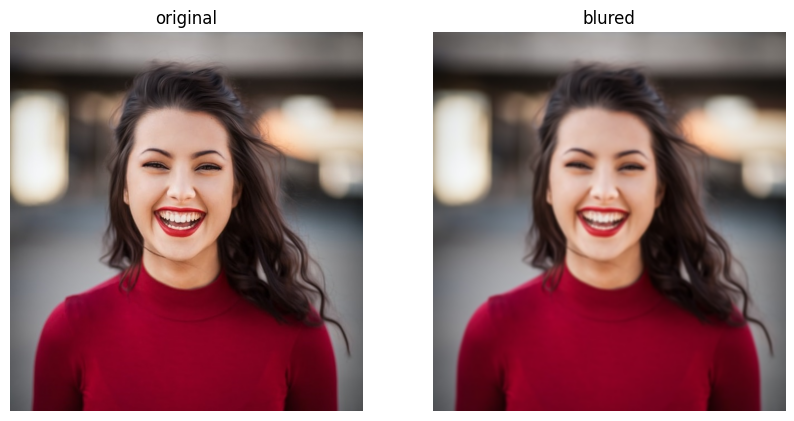

In [8]:
# 5x5 averaging filter kernel (blur_avg_kernel.py)

import cv2
import numpy as np

img = cv2.imread('./images/lady.jpg')
'''
#5x5 평균 필터 커널 생성    ---①
kernel = np.array([[0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04]])
'''
kernel = np.ones((5,5))/5**2
blured = cv2.filter2D(img, -1, kernel)

cv2.imshow('origin', img)
cv2.imshow('avrg blur', blured) 
cv2.waitKey()
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=100)

plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('off')
plt.subplot(122),plt.imshow(cv2.cvtColor(blured, cv2.COLOR_BGR2RGB)),plt.title('blured'),plt.axis('off')
plt.show()

np.ones((5, 5))/5^2 : Average blurring filter   
- Since we need to apply average blurring, we have divided it by 5^2 (=25), which is the number of elements in a 5 x 5 filter.
<img src = './images/practice_img/filters.png' width=400 height=400>  

- The larger the size of the filter, the less sharpness it will be when average blurring is applied.

### Apply average blurring without creating your own kernel

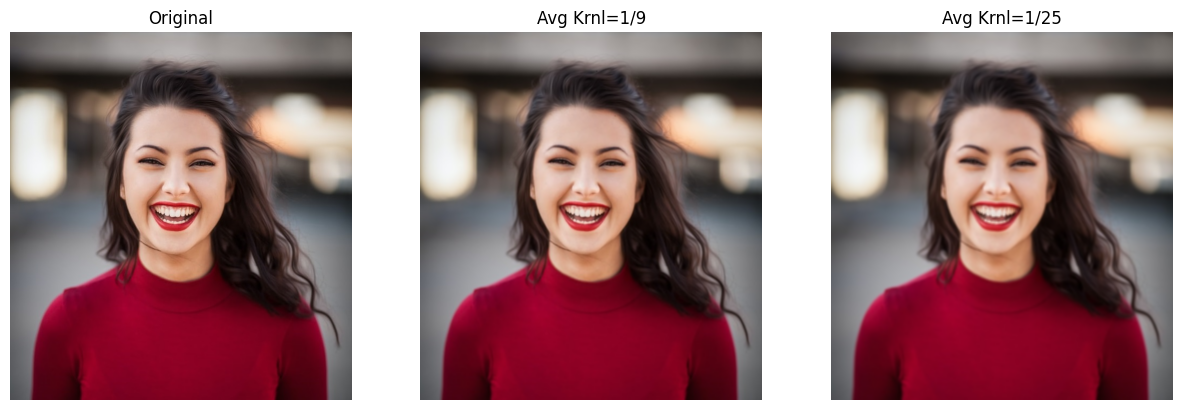

In [9]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

img = cv.imread('./images/lady.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
kernel1 = np.ones((3,3),np.float32)/9
kernel2 = np.ones((5,5),np.float32)/25
dst1 = cv.filter2D(img,-1,kernel1)
dst2 = cv.filter2D(img,-1,kernel2)

plt.subplot(131),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original'),plt.axis('off')
plt.subplot(132),plt.imshow(cv2.cvtColor(dst1, cv2.COLOR_BGR2RGB)),plt.title('Avg Krnl=1/9'),plt.axis('off')
plt.subplot(133),plt.imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB)),plt.title('Avg Krnl=1/25'),plt.axis('off')
plt.show()

## ▶ Image Blurring (Image Smoothing)  

Image processing is the process of obtaining a new pixel value by applying an operation to an existing pixel value to obtain a new image.   
When obtaining a new pixel value, the method of using the value of the surrounding pixels instead of the value of a single pixel is called spacial domain filtering.  
Blurring refers to the process of blurring an existing image.

영상 처리는 새로운 영상을 얻기 위해 기존 픽셀 값에 어떤 연산을 가해서 새로운 픽셀 값을 얻는 작업입니다.   
새로운 픽셀 값을 얻을 때 하나의 픽셀 값이 아닌 그 주변 픽셀들의 값을 활용하는 방법을 공간 영역 필터링(spacial domain filtering)라고 합니다.  
블러링(Blurring)이란 기존의 영상을 흐릿하게 만드는 작업을 뜻합니다.

Image smoothing is an image processing technique used for removing the noise in an image.  
Blurring(smoothing) removes low-intensity edges and is also beneficial in hiding the details;   
for example, blurring is required in many cases, such as hiding any confidential information in an image.  
OpenCV provides mainly the following type of blurring techniques.

흐림 효과(Blur)는 블러링(Blurring) 또는 스무딩(Smoothing)이라 불리며, 노이즈를 줄이거나 외부 영향을 최소화하는 데 사용됩니다.  
흐림 효과는 영상이나 이미지를 번지게 하며, 해당 픽셀의 주변 값들과 비교하고 계산해서 픽셀들의 색상을 재조정합니다.
단순히 이미지를 흐리게 만드는 것뿐만 아니라 노이즈를 제거해서 연산 시 계산을 빠르고 정확하게 수행하는 데 도움을 줍니다.
또한, 이미지의 해상도를 변경하는 경우에도 사용되는데 이미지의 크기를 변경하면 존재하지 않는 데이터를 생성하거나 존재하는 데이터를 줄여야 하므로 샘플링된 이미지를 재구성할 때 사용됩니다.

Here are a few of the methods that we are going to use for smoothing an image:

- OpenCV averaging
- OpenCV Gaussian Blur
- OpenCV median Blur
- OpenCV Bilateral Filter  

Image blurring is achieved by convolving the image with a low-pass filter kernel.   
It is useful for removing noise. It actually removes high frequency content (eg: noise, edges) from the image.   
So edges are blurred a little bit in this operation (there are also blurring techniques which don't blur the edges).   

OpenCV provides four main types of blurring techniques.

## 1. Averaging  
                                                     
This is done by convolving an image with a normalized box filter.   
It simply takes the average of all the pixels under the kernel area and replaces the central element.     
This is done by the function **cv.blur()** or **cv.boxFilter()**.  
                                                     
Check the docs for more details about the kernel. We should specify the width and height of the kernel.   
A 3x3 normalized box filter would look like the below:  

<img src = './images/practice_img/kernel_9.png' width=300 height=300>  

In this technique, we normalize the image with a box filter. It calculates the average of all the pixels which are under the kernel area(box filter) and replaces the value of the pixel at the center of the box filter with the calculated average. OpenCV provides the cv2.blur() to perform this operation. 

Syntax:

>**cv2.blur(src, ksize,anchor, borderType)**

Parameters:

- src: It is the image which is to be blurred.
- ksize: A tuple representing the blurring kernel size.
- anchor: It is a variable of type integer representing anchor point and it’s default value Point is (-1, -1) which means that the anchor is at the kernel center.
- borderType: It represents the type of border to be used for the output.

Example:

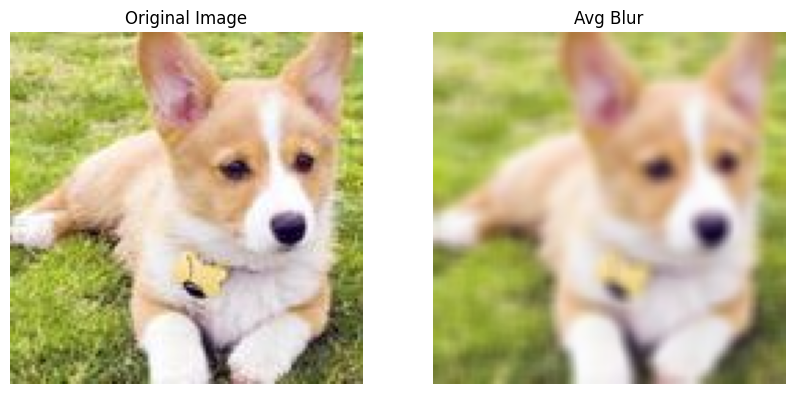

In [33]:
import cv2
img = cv2.imread('./images/dogs/02.jpg', -1) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_avg = cv2.blur(img,(5,5))

fig, axs = plt.subplots(1,2,figsize=(10,10))
axs[0].imshow(img), axs[0].axis('off'), axs[0].set_title('Original Image')
axs[1].imshow(img_avg), axs[1].axis('off'), axs[1].set_title('Avg Blur')

plt.imshow(img),plt.imshow(img_avg)
plt.show()  

### ■ The cv2.boxFilter() function : does the same as the cv2.blur() function if you pass True to normalize.  

- **cv2.boxFilter(src, ddepth, ksize, dst, anchor, normalize, borderType)**  

>- normalize(optional): normalize(1/ksize²) (Boolean, default=True)
>- the others are the same as cv2.blur()
                                   
~ Example : 

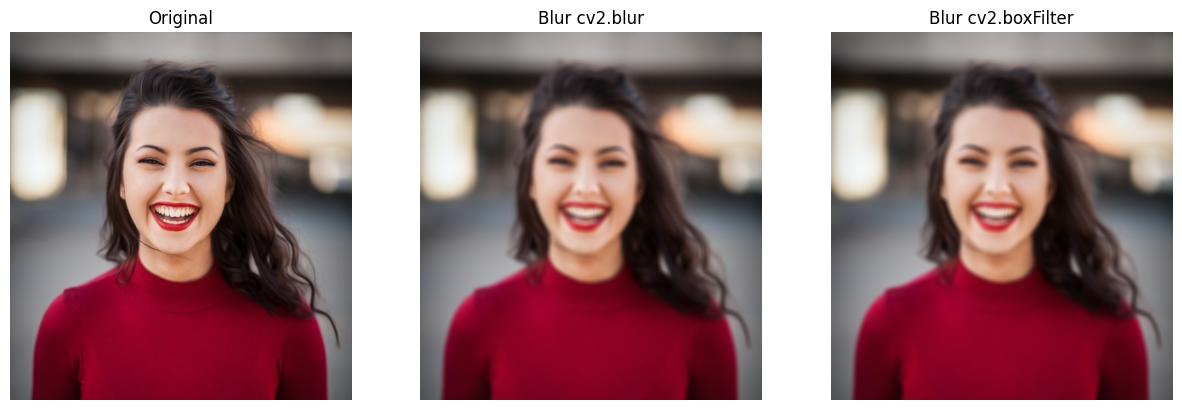

In [10]:
# cv2.boxFilter (blur_avg_api.py)

import cv2
import numpy as np

file_name = './images/lady.jpg'
img = cv2.imread(file_name)

blur1 = cv2.blur(img, (10,10))          
blur2 = cv2.boxFilter(img, -1, (10,10)) 

merged = np.hstack((img, blur1, blur2))
cv2.imshow('blur', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

plt.subplot(131),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original'),plt.axis('off')
plt.subplot(132),plt.imshow(cv2.cvtColor(blur1, cv2.COLOR_BGR2RGB)),plt.title('Blur cv2.blur'),plt.axis('off')
plt.subplot(133),plt.imshow(cv2.cvtColor(blur2, cv2.COLOR_BGR2RGB)),plt.title('Blur cv2.boxFilter'),plt.axis('off')
plt.show()

## 2. Gaussian Blurring  

In this method, instead of a box filter, a Gaussian kernel is used. It is done with the function, cv.GaussianBlur().   
- We should specify the width and height of the kernel which should be positive and odd.   
- We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively.   
- If only sigmaX is specified, sigmaY is taken as the same as sigmaX.   
- If both are given as zeros, they are calculated from the kernel size.   
- Gaussian blurring is highly effective in removing Gaussian noise from an image.

If you want, you can create a Gaussian kernel with the function, **cv.getGaussianKernel()**.

가우시안 분포를 갖는 커널로 블러링 하는 것을 가우시안 블러링이라고 합니다.   
- 가우시안 분포(gaussian distribution)란 정규 분포(normal distribution)이라고도 하는데,   
- 평균 근처에 몰려 있는 값들의 개수가 많고 평균에서 멀어질수록 그 개수가 적어지는 분포를 말합니다.

가우시안 블러링 커널은 아래와 같이 중앙값이 가장 크고 중앙에서 멀어질수록 그 값이 작아집니다. 

<img src = './images/practice_img/kernel3.png' width=500 height=500>  


- The reason we divided by 16 in the first kernel is because the sum of all elements in the kernel is 16. (1+2+1+2+4+2+1+2+1 = 16)     
- The second kernel is also divided by 256 because the sum of all the elements is 256.   
- When this Gaussian blurring kernel is applied, the closer it is to the target pixel, the more it affects it, and the farther away it is, the less it affects it, so it is similar to the original image but has the effect of removing noise.  

In this technique, a Gaussian function(kernel) instead of a box filter to blur the image.  
- The width and height of the kernel needs to be specified and they should be positive and odd.  
- We also have to specify the standard deviation in the directions X and Y and are represented by sigmaX and sigmaY respectively.   
- If both sigmaX and sigmaY are given as zeros, they are calculated from the kernel size and if we only specify sigmaX, sigmaY is set to the same value.   
- Gaussian blurring is highly effective when removing Gaussian noise from an image.   

In OpenCV we have a function GaussianBlur() to implement this technique easily.   

~ Syntax:

>**GaussianBlur(src, dst, ksize, sigmaX, sigmaY)**  

~ Parameters:

- src − Input image which is to be blurred
- dst − output image of the same size and type as src.
- ksize − A Size object representing the size of the kernel.
- sigmaX − A variable of the type double representing the Gaussian kernel standard deviation in X direction.
>- If sigmaX passes 0, it automatically selects the standard deviation and uses it.
- sigmaY − A variable of the type double representing the Gaussian kernel standard deviation in Y direction.  
>- If sigmaY is omitted, it is the same as the sigmaX value.
- Since the ret(returned filter) is one-dimensional, if you want to use it in the cv2.filter2D() function, use ret * ret. It must be passed in the form of T.  

        - ksize: 커널 크기 (주로 홀수)
        - sigmaX: X 방향 표준편차 (0: default)
        - sigmaY(optional): Y 방향 표준편차 (default: sigmaX)
        - borderType(optional): 외곽 테두리 보정 방식
        - ret: 가우시안 커널 (1차원이므로 ret * ret.T 형태로 사용해야 함)

Example:

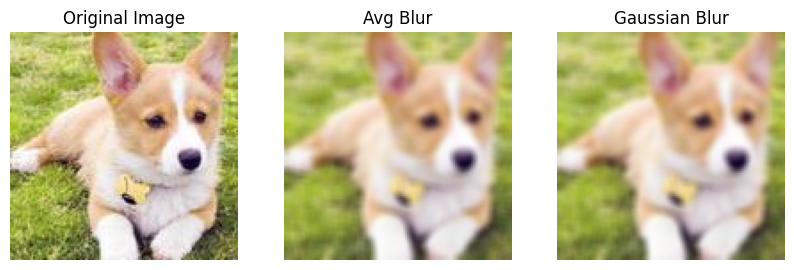

In [36]:
import cv2
img = cv2.imread('./images/dogs/02.jpg', -1) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gau = cv2.GaussianBlur(img, (5, 5), cv2.BORDER_DEFAULT)

fig, axs = plt.subplots(1,3,figsize=(10,10))
axs[0].imshow(img), axs[0].axis('off'), axs[0].set_title('Original Image')
axs[1].imshow(img_avg), axs[1].axis('off'), axs[1].set_title('Avg Blur')
axs[2].imshow(img_gau), axs[2].axis('off'), axs[2].set_title('Gaussian Blur')

plt.imshow(img),plt.imshow(img_avg),plt.imshow(img_gau)
plt.show()

k1: [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
k2: [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


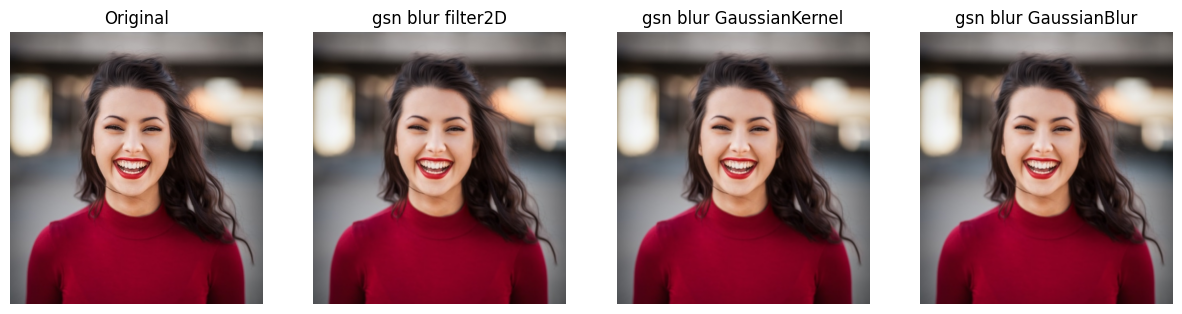

In [5]:
# blur_gaussian.py

import cv2
import numpy as np

img = cv2.imread('./images/lady.jpg')

k1 = np.array([[1, 2, 1],
                [2, 4, 2],
                [1, 2, 1]]) *(1/16)
blur1 = cv2.filter2D(img, -1, k1)

k2 = cv2.getGaussianKernel(3, 0)
blur2 = cv2.filter2D(img, -1, k2*k2.T)

blur3 = cv2.GaussianBlur(img, (3, 3), 0) 

print('k1:', k1)
print('k2:', k2*k2.T)
merged = np.hstack((img, blur1, blur2, blur3))
cv2.imshow('gaussian blur', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

plt.subplot(141),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original'),plt.axis('off')
plt.subplot(142),plt.imshow(cv2.cvtColor(blur1, cv2.COLOR_BGR2RGB)),plt.title('gsn blur filter2D'),plt.axis('off')
plt.subplot(143),plt.imshow(cv2.cvtColor(blur2, cv2.COLOR_BGR2RGB)),plt.title('gsn blur GaussianKernel'),plt.axis('off')
plt.subplot(144),plt.imshow(cv2.cvtColor(blur2, cv2.COLOR_BGR2RGB)),plt.title('gsn blur GaussianBlur'),plt.axis('off')
plt.show()

- First, we created a Gaussian filter ourselves and passed it to the cv2.filter2D() function to apply blurring.
- Second, we obtained the Gaussian kernel using the cv2.getGaussianKernel() function.
- Blurring was applied by passing the obtained kernel to the cv2.filter2D() function.
- Please note that it must be delivered in a format such as k2xk2.T.
- Lastly, we used the cv2.GaussianBlur() function to apply Gaussian blurring directly without obtaining a separate filter.
- The resulting image is small and hard to see, but you can see that the noise has been removed.
- Like this, **Gaussian blurring has the effect of removing noise**.  


- 첫 번째로 가우시안 필터를 직접 생성해서 cv2.filter2D() 함수에 전달하여 블러링을 적용했습니다.   
- 두 번째로 cv2.getGaussianKernel() 함수를 이용해 가우시안 커널을 얻었습니다.   
- 얻은 커널을 역시 cv2.filter2D() 함수에 전달하여 블러링을 적용했습니다.   
- 이때 주의할 것은 k2xk2.T와 같은 형태로 전달해야 한다는 점입니다.   
- 마지막으로 cv2.GaussianBlur() 함수를 활용하여 필터를 별도로 구하지 않고 직접 가우시안 블러링을 적용했습니다.   
- 결과 이미지가 작아서 잘 안 보이겠지만 노이즈가 제거된 것을 알 수 있습니다.   
- 이렇듯 **가우시안 블러링은 노이즈를 제거하는 효과**가 있습니다.

## 3. Median Blurring  

Here, the function **cv.medianBlur()** takes the median of all the pixels under the kernel area and the central element is replaced with this median value.   
- This is highly effective against salt-and-pepper noise in an image.   
- Interestingly, in the above filters, the central element is a newly calculated value which may be a pixel value in the image or a new value.   

But in median blurring, the central element is always replaced by some pixel value in the image.   
- It reduces the noise effectively. Its kernel size should be a positive odd integer.
- In this technique, the median of all the pixels under the kernel window is computed and the central pixel is replaced with this median value.   
- It has one advantage over the Gaussian and box filters, that being the filtered value for the central element is always replaced by some pixel value in the image which is not the case in case of either Gaussian or box filters.  

OpenCV provides a function medianBlur() that can be used to easily implement this kind of smoothing.  

커널의 픽셀 값 중 중앙값을 선택하는 것을 미디언 블러링이라고 합니다.   
- 미디언 블러링은 소금-후추 잡음을 제거하는 효과가 있습니다.   
- 소금-후추 잡음이란 이미지에 소금과 후추를 뿌린 것과 같이 생긴 잡음을 뜻합니다.   

OpenCV는 미디언 블러링을 위해 아래 함수를 제공합니다.

Syntax:

>**cv2.medianBlur(src, dst, ksize)**

Parameters:

- src – It represents the source (input image).
- dst – It represents the destination (output image).
- ksize – It represents the size of the kernel.

Example: 
          

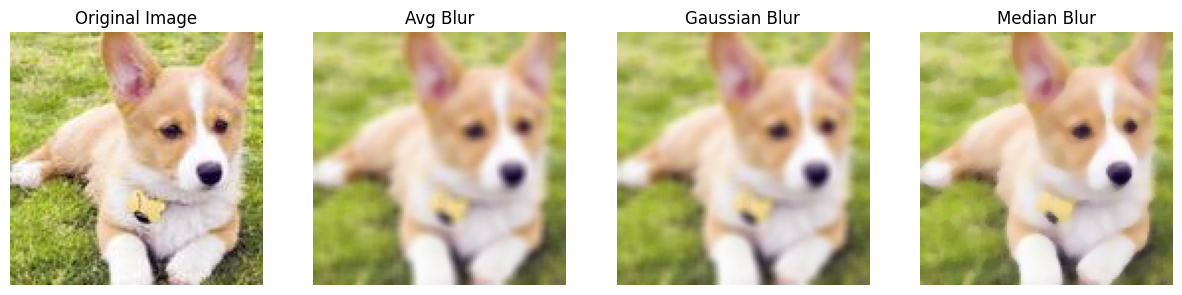

In [39]:
import cv2
img = cv2.imread('./images/dogs/02.jpg', -1) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gau = cv2.GaussianBlur(img, (5, 5), cv2.BORDER_DEFAULT)
img_med = cv2.medianBlur(img,5)

fig, axs = plt.subplots(1,4,figsize=(15,15))
axs[0].imshow(img), axs[0].axis('off'), axs[0].set_title('Original Image')
axs[1].imshow(img_avg), axs[1].axis('off'), axs[1].set_title('Avg Blur')
axs[2].imshow(img_gau), axs[2].axis('off'), axs[2].set_title('Gaussian Blur')
axs[3].imshow(img_med), axs[3].axis('off'), axs[3].set_title('Median Blur')

plt.imshow(img),plt.imshow(img_avg),plt.imshow(img_gau),plt.imshow(img_med)
plt.show() 

In [22]:
# blur_median.py

import cv2
import numpy as np

img = cv2.imread('./images/practice_img/salt_pepper_noise.jpg')

blur = cv2.medianBlur(img, 5) 

merged = np.hstack((img,blur))
cv2.imshow('median', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=100)

plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original'),plt.axis('off')
plt.subplot(122),plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)),plt.title('median blur'),plt.axis('off')
plt.show()

In [ ]:
## 4. Bilateral Filtering  

**cv.bilateralFilter()** is highly effective in noise removal while keeping edges sharp.   

- But the operation is slower compared to other filters.   

We already saw that a Gaussian filter takes the neighbourhood around the pixel and finds its Gaussian weighted average.   
This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering.   
- It doesn't consider whether pixels have almost the same intensity.   
- It doesn't consider whether a pixel is an edge pixel or not.   
- So it blurs the edges also, which we don't want to do.

- The Gaussian function of space makes sure that only nearby pixels are considered for blurring,   
- while the Gaussian function of intensity difference makes sure that only those pixels with similar intensities to the central pixel are considered for blurring.   
- So it preserves the edges since pixels at edges will have large intensity variation.

Bilateral filtering also takes a Gaussian filter in space, but one more Gaussian filter which is a function of pixel difference.   
The below sample shows use of a bilateral filter (For details on arguments, visit docs).  

지금까지 적용한 블러링은 잡음을 제거하는 효과는 뛰어났지만 그만큼 경계도 흐릿하게됨.   
- 바이레터럴 필터는 이를 개선하기 위해 가우시안 필터와 경계 필터를 결합합니다.   
- 경계도 뚜렷하고 노이즈도 제거되는 효과가 있지만 속도가 느리다는 단점이 있습니다.

In OpenCV we have cv.bilateralFilter() method that can implement this filter.   

~ Syntax:  
    
- **cv2.bilateralFilter(src, dst, d, sigmaColor,sigmaSpace, borderType)**  

~ Parameters:  

- src: Source 8-bit or floating-point, 1-channel or 3-channel image.
- dst – Destination image of the same size and type as src .
- d: Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.5보다 크면 매우 느림    
- sigmaColor: Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.  
- sigmaSpace: Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.  
>- Generally, sigmaColor and sigmaSpace use the same value, and the recommended value range is 10 to 150..  
- borderType – border mode used to extrapolate pixels outside of the image, see the BorderTypes available here.

Example:    

<Figure size 800x800 with 0 Axes>

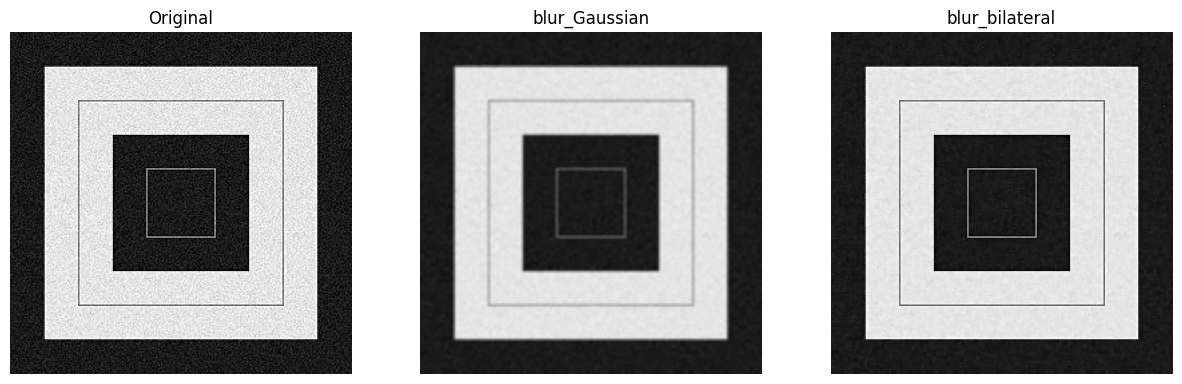

In [4]:
# blur_bilateral.py comparing bilateral to Gaussian

import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 8), dpi=100)
# img = cv2.imread('./images/lady.jpg')
img = cv2.imread('./images/practice_img/gaussian_noise.jpg')

blur_Gaussian = cv2.GaussianBlur(img, (5,5), 0)
blur_bilateral = cv2.bilateralFilter(img, 5, 75, 75)

merged = np.hstack((img, blur_Gaussian, blur_bilateral))
cv2.imshow('bilateral', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

plt.subplot(131),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original'),plt.axis('off')
plt.subplot(132),plt.imshow(cv2.cvtColor(blur_Gaussian, cv2.COLOR_BGR2RGB)),plt.title('blur_Gaussian'),plt.axis('off')
plt.subplot(133),plt.imshow(cv2.cvtColor(blur_bilateral, cv2.COLOR_BGR2RGB)),plt.title('blur_bilateral'),plt.axis('off')
plt.show()

When a Gaussian filter is applied, the threshold value is blurred,   
but when a bilateral filter is applied, the noise is reduced while the threshold value is maintained.

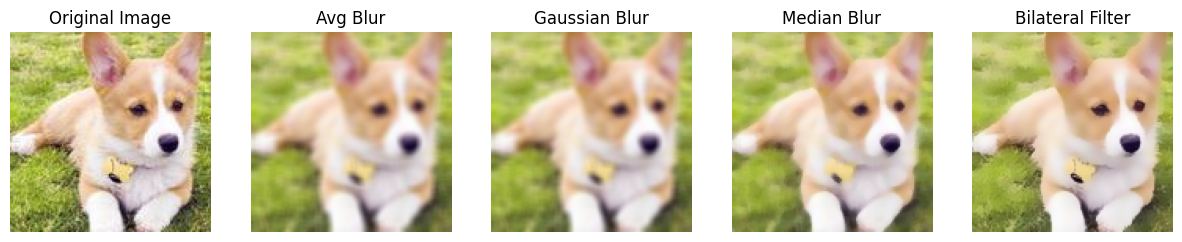

In [42]:
import cv2
img = cv2.imread('./images/dogs/02.jpg', -1) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_bl =cv2.bilateralFilter(img,9,75,75)

fig, axs = plt.subplots(1,5,figsize=(15,15))
axs[0].imshow(img), axs[0].axis('off'), axs[0].set_title('Original Image')
axs[1].imshow(img_avg), axs[1].axis('off'), axs[1].set_title('Avg Blur')
axs[2].imshow(img_gau), axs[2].axis('off'), axs[2].set_title('Gaussian Blur')
axs[3].imshow(img_med), axs[3].axis('off'), axs[3].set_title('Median Blur')
axs[4].imshow(img_bl), axs[4].axis('off'), axs[4].set_title('Bilateral Filter')

plt.imshow(img),plt.imshow(img_avg),plt.imshow(img_gau),plt.imshow(img_med),plt.imshow(img_bl)
plt.show()